In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/HUMAN DET/view-1/0 - 2019-12-20 11-00-00-365.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

31013.0

In [3]:
110 * 25 

2750

In [4]:
cap.set(cv2.CAP_PROP_POS_FRAMES,3700)

True

In [5]:
#%matplotlib notebook

(576, 704, 3)


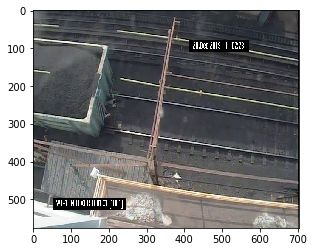

In [6]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
plt.imshow(frame)

In [7]:
emptyTrain = cv2.imread("trainEmpty.jpg")
blurEmptyTrain = cv2.GaussianBlur(emptyTrain,(11,9),0)

In [8]:
temp = frame[300:340,202:230]

In [9]:
#temp = frame[246:275,246:270]
#cv2.imwrite("template1.jpg",temp)

template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]

while(True):

    ret, img = cap.read()
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(imgGray,template,cv2.TM_CCOEFF_NORMED) #cv2.TM_CCOEFF_NORMED)cv2.TM_CCOEFF
    threshold = 0.79
    loc = np.where( res >= threshold)
    
    if len(loc) == 2:
        for pt in zip(*loc[::-1]):
            print(pt)
            cv2.rectangle(imgGray, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
            template = imgGray[pt[1]:pt[1]+h, pt[0]:pt[0]+w]
            w, h = template.shape[::-1]
            break
    ''' else:
        template = cv2.imread('template1.jpg',0)
        w, h = template.shape[::-1]'''
        
            
    cv2.imshow("ij",imgGray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.waitKey(0)
cv2.destroyAllWindows()

# Bs

In [26]:
backSub = cv2.createBackgroundSubtractorMOG2(800,150,False)
#backSub = cv2.createBackgroundSubtractorKNN(detectShadows=False)
    
capture = cv2.VideoCapture(cv2.samples.findFileOrKeep("C:/Users/shrin/Documents/Abhilash/tata steel/HUMAN DET/view-1/0 - 2019-12-20 11-00-00-365.mov"))

capture.set(cv2.CAP_PROP_POS_FRAMES,2000)

if not capture.isOpened:
    print('Unable to open: ' + args.input)
    exit(0)
while True:
    ret, frame = capture.read()
    if frame is None:
        break
    
    blurFrame = cv2.GaussianBlur(frame,(11,9),0)
    x = cv2.cvtColor(blurFrame, cv2.COLOR_RGB2GRAY)
    
    undistortedThreh = cv2.adaptiveThreshold(x, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 591,-35)
    undistortedThreh = cv2.erode(undistortedThreh.copy(),(7,7), iterations = 4)
    # cnts
    _ , contours, hierarchy =   cv2.findContours(undistortedThreh.copy(),cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)

    
    
    for c in cnts[0:6]:
        if cv2.contourArea(c) > 500:
            '''perimeter = cv2.arcLength(c,True)
            epsilon = 0.1*cv2.arcLength(c,True)
            approx = cv2.approxPolyDP(c,epsilon,True)'''
            x,y,w,h = cv2.boundingRect(c)
            #blurFrame = cv2.drawContours(blurFrame,c,-1,255,-1)

            if  y > 50 and y < 430:
                '''mask = np.ones(frame.shape[:2],np.uint8)
                mask = cv2.drawContours(mask, c,-1, 0, -1)
                blurFrame = cv2.bitwise_and(blurFrame, blurEmptyTrain, mask=mask)'''
                
                blurFrame[y:y+h+20,x:691] = blurEmptyTrain[y:y+h+20,x:691]
            
            else:
                continue


    
    fgMask = backSub.apply(blurFrame)
    
    cv2.rectangle(fgMask, (410, 80), (573,110), (0), -1)
    cv2.rectangle(fgMask, (20, 300), (40,345), (0), -1)  # time = [410,80,573,110]  blinkRed = [20,300,40,345]
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    fgMask = dilation = cv2.dilate(fgMask,kernel,iterations = 15)
    
    '''img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img.copy()) 
    hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
    y,u,vb = cv2.split(yuv)'''
    
    
    # thrsh
    _,undistortedThreh = cv2.threshold(fgMask,230,250,cv2.THRESH_BINARY) 
    blank = np.zeros((undistortedThreh.shape))
    cntDraw = blank.copy()
    # cnts
    _ , contours, hierarchy =   cv2.findContours(undistortedThreh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    
    if len(cnts)< 15:
        for c in cnts:
            print(cv2.contourArea(c))
            if cv2.contourArea(c) < 3000 and cv2.contourArea(c) > 35:
                perimeter = cv2.arcLength(c,True)
                epsilon = 0.1*cv2.arcLength(c,True)
                approx = cv2.approxPolyDP(c,epsilon,True)
                x,y,w,h = cv2.boundingRect(approx)
                if x > 165 and x < 691 and y > 190 and y < 340:# (165, 190, 691, 423)
                    #cv2.rectangle(frame, (250,45), (350,85), (255,255,255), -1)
                    cv2.putText(frame, "....Man IN Danger Zone....", (175, 45),
               cv2.FONT_HERSHEY_SIMPLEX, 1 , (0,0,255),2)
                    
                cv2.rectangle(frame, (x, y), (x+w,y+h), (0,255,25), 2)
                cntDraw = cv2.drawContours(blank,[approx],-1,255,2)
            
            
        
    print("Next----------------------------------------------------------------------------------------------")
    
    #draw cnt
    
    
    
        
    
    cv2.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)), (15, 15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask', fgMask)
    cv2.imshow('thresh', undistortedThreh)
    cv2.imshow('Cnt Draw', cntDraw)
    cv2.imshow("appended frame",blurFrame)
    #cv2.imshow("mask",mask)
    #time.sleep(.1)
    
    '''cv2.imshow('g', g)
    cv2.imshow('b', b)
    cv2.imshow('h', h)
    cv2.imshow('s', s)
    cv2.imshow('v', v)'''
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.waitKey(0)
cv2.destroyAllWindows()

404225.0
268.0
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
2425.5
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
1164.0
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------------------------------
893.0
Next----------------------------------------------------------------------------------------------
Next----------------------------------------------------------------------

2749.0
Next----------------------------------------------------------------------------------------------
2794.0
Next----------------------------------------------------------------------------------------------
2848.5
510.0
Next----------------------------------------------------------------------------------------------
2905.5
510.0
Next----------------------------------------------------------------------------------------------
2971.0
Next----------------------------------------------------------------------------------------------
3007.5
Next----------------------------------------------------------------------------------------------
3042.5
Next----------------------------------------------------------------------------------------------
3058.0
Next----------------------------------------------------------------------------------------------
3088.5
Next----------------------------------------------------------------------------------------------
3146.0
Next-----------------------

1644.5
1549.5
Next----------------------------------------------------------------------------------------------
1882.5
1350.0
Next----------------------------------------------------------------------------------------------
1913.5
1454.5
Next----------------------------------------------------------------------------------------------
2106.0
1374.5
Next----------------------------------------------------------------------------------------------
2414.5
1431.5
Next----------------------------------------------------------------------------------------------
2365.0
1381.5
Next----------------------------------------------------------------------------------------------
2947.5
1401.5
Next----------------------------------------------------------------------------------------------
3137.0
1455.0
Next----------------------------------------------------------------------------------------------
3168.0
1451.0
Next------------------------------------------------------------------------------

1643.0
Next----------------------------------------------------------------------------------------------
1786.5
Next----------------------------------------------------------------------------------------------
1793.5
Next----------------------------------------------------------------------------------------------
1846.0
Next----------------------------------------------------------------------------------------------
1737.0
Next----------------------------------------------------------------------------------------------
1721.5
Next----------------------------------------------------------------------------------------------
1914.0
Next----------------------------------------------------------------------------------------------
2001.5
Next----------------------------------------------------------------------------------------------
2062.5
Next----------------------------------------------------------------------------------------------
2124.0
Next-----------------------------------

812.0
617.5
Next----------------------------------------------------------------------------------------------
846.0
654.5
Next----------------------------------------------------------------------------------------------
976.0
689.5
Next----------------------------------------------------------------------------------------------
985.0
689.5
Next----------------------------------------------------------------------------------------------
1022.0
739.0
Next----------------------------------------------------------------------------------------------
1049.5
789.5
Next----------------------------------------------------------------------------------------------
1068.0
857.5
Next----------------------------------------------------------------------------------------------
1237.0
875.0
Next----------------------------------------------------------------------------------------------
1257.5
892.5
Next-------------------------------------------------------------------------------------------

1664.0
731.0
Next----------------------------------------------------------------------------------------------
1244.0
714.5
Next----------------------------------------------------------------------------------------------
1198.5
714.5
Next----------------------------------------------------------------------------------------------
1233.5
713.5
Next----------------------------------------------------------------------------------------------
1261.5
714.5
Next----------------------------------------------------------------------------------------------
1253.5
714.5
Next----------------------------------------------------------------------------------------------
1253.5
714.5
Next----------------------------------------------------------------------------------------------
1257.5
713.5
Next----------------------------------------------------------------------------------------------
1205.0
712.5
Next---------------------------------------------------------------------------------------

2420.5
Next----------------------------------------------------------------------------------------------
1933.5
557.5
Next----------------------------------------------------------------------------------------------
1920.5
607.0
Next----------------------------------------------------------------------------------------------
1919.0
607.0
Next----------------------------------------------------------------------------------------------
1919.0
607.0
Next----------------------------------------------------------------------------------------------
1943.0
575.0
Next----------------------------------------------------------------------------------------------
1949.0
574.0
Next----------------------------------------------------------------------------------------------
1927.0
574.0
Next----------------------------------------------------------------------------------------------
1926.0
558.5
Next---------------------------------------------------------------------------------------------

In [11]:
#%matplotlib notebook

In [12]:
x = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

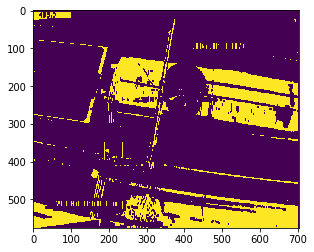

In [13]:
#_,undistortedThreh = cv2.threshold(x,100,250,cv2.THRESH_BINARY) 
undistortedThreh = cv2.adaptiveThreshold(x, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 591,-35)
undistortedThreh = cv2.erode(undistortedThreh.copy(),(7,7), iterations = 4)
# cnts
_ , contours, hierarchy =   cv2.findContours(undistortedThreh.copy(),cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea,reverse= True)
plt.imshow(undistortedThreh)

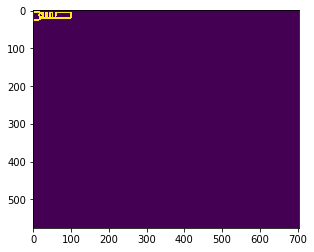

In [14]:
blank = np.zeros((x.shape))
cntDraw = blank.copy()
blank = cv2.drawContours(blank.copy(),cnts,5,255,3)
plt.imshow(blank)

In [15]:
#if x > 165 and x < 691 and y > 190 and y < 340:# (165, 190, 691, 423)
#cv2.line(x,(0,300),(691,430),0,5)
#cv2.line(x,(0,50),(691,165),0,5)

In [16]:
import imutils

In [17]:
rot = imutils.rotate(x,11)

In [18]:
cv2.imshow("rot",rot)
cv2.waitKey(0)
cv2.destroyAllWindows()

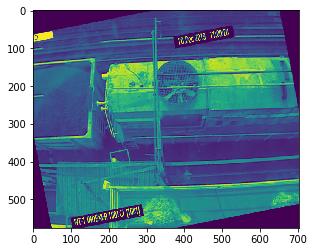

In [19]:
plt.imshow(rot)

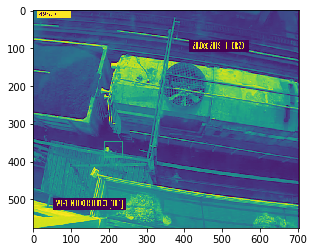

In [20]:
plt.imshow(x)

In [21]:
for c in cnts:
    if cv2.contourArea(c) > 5000:
        perimeter = cv2.arcLength(c,True)
        epsilon = 0.1*cv2.arcLength(c,True)
        approx = cv2.approxPolyDP(c,epsilon,True)
        x,y,w,h = cv2.boundingRect(approx)
        
        if  y > 50 and y < 430:
            frame[y:y+h,x:691] = emptyTrain[y:y+h,x:691]
            



In [22]:
#plt.imshow(x)

In [23]:
time = [410,80,573,110]
blink = [20,300,40,345]

165,190,691,423

(165, 190, 691, 423)